In [1]:
import argparse
import os
import tqdm
import utils
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def encode_data(data, algorithm, verbose):
    imgs = []
    
    data = np.array(data*255, np.uint8)
    ttrain = tqdm.tqdm(range(len(data.transpose()[0].transpose())-31)) if eval(verbose) else range(len(data.transpose()[0].transpose())-31)
    for t in ttrain:
        img = np.array([np.array(encode(data.transpose()[0].transpose(), t, algorithm), np.uint8),
                        np.array(encode(data.transpose()[2].transpose(), t, algorithm), np.uint8),
                        np.array(encode(data.transpose()[3].transpose(), t, algorithm), np.uint8)])
        img = np.swapaxes(img, 0, -1)
        imgs.append(img)
    imgs = np.array(imgs)
    
    return imgs

In [ ]:
def encode_data(data, algorithm, verbose):
    imgs = []
    
    data = np.array(data*255, np.uint8)
    ttrain = tqdm.tqdm(range(len(data.transpose()[0].transpose()))) if eval(verbose) else range(len(data.transpose()[0].transpose()))
    for t in ttrain:
        img = np.array([np.array(utils.encode(data.transpose()[0].transpose()[t], algorithm), np.uint8),
                        np.array(utils.encode(data.transpose()[2].transpose()[t], algorithm), np.uint8),
                        np.array(utils.encode(data.transpose()[3].transpose()[t], algorithm), np.uint8)])
        img = np.swapaxes(img, 0, -1)
        imgs.append(img)
    imgs = np.array(imgs)
    
    return imgs

In [3]:
import pyts.image

def encode(series, time, algorithm='Recurrent Plot'):
    if algorithm in ['Recurrent Plot', 'RP']:
        series = series[time]
        length = series.size
        repeat = np.repeat(series[None, :], length, axis=0)
        recurr = np.floor(np.abs(repeat - repeat.T))
        recurr[recurr>255] = 255
        return recurr
    
    elif algorithm in ['GASF']:
        gasf = pyts.image.GramianAngularField(image_size=32, method="summation")
        series_s = gasf.fit_transform(series[time].reshape(1, -1))
        
        return series_s[0]
    
    elif algorithm in ['GADF']:
        gadf = pyts.image.GramianAngularField(image_size=32, method="difference")
        series_d = gadf.fit_transform(series[time].reshape(1, -1))
        
        return series_d[0]
    
    elif algorithm in ['GAF']:
        gasf = pyts.image.GramianAngularField(image_size=32, method="summation")
        series_s = gasf.fit_transform(series[time].reshape(1, -1))
        
        gadf = pyts.image.GramianAngularField(image_size=32, method="difference")
        series_d = gadf.fit_transform(series[time].reshape(1, -1))
        
        gaf = series_s + series_d
        
        return gaf[0]
    
    elif algorithm in ['stack']:
        return np.array(np.vstack(series[time:time+32])*255, np.uint8)

In [4]:
raws = utils.load_data('/working/srcs/comp_prep/data/', 'BRS_data.pkl')[:10034]

100%|██████████████████████████████████████████████████████████████████████████| 10003/10003 [00:00<00:00, 13728.35it/s]


15 17 9 9


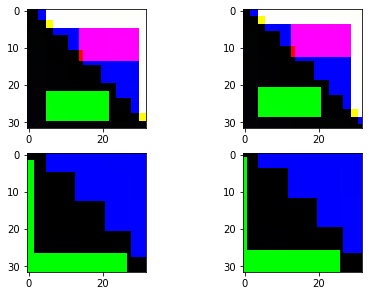

In [5]:
RP_imgs = encode_data(raws, "RP", "True")

plt.subplots(constrained_layout=True);
plt.subplot(221); plt.imshow(RP_imgs[101])
plt.subplot(222); plt.imshow(RP_imgs[102])
plt.subplot(223); plt.imshow(RP_imgs[10001])
plt.subplot(224); plt.imshow(RP_imgs[10002])
print(
    len(np.unique(RP_imgs[101])),
    len(np.unique(RP_imgs[102])),
    len(np.unique(RP_imgs[10001])),
    len(np.unique(RP_imgs[10002]))
     )

100%|███████████████████████████████████████████████████████████████████████████| 10003/10003 [00:01<00:00, 8276.37it/s]


28 28 15 15


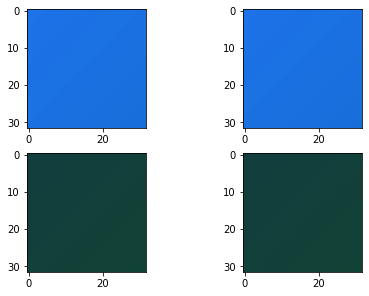

In [6]:
CP_imgs = encode_data(raws, "stack", "True")

plt.subplots(constrained_layout=True);
plt.subplot(221); plt.imshow(CP_imgs[101])
plt.subplot(222); plt.imshow(CP_imgs[102])
plt.subplot(223); plt.imshow(CP_imgs[10001])
plt.subplot(224); plt.imshow(CP_imgs[10002])
print(
    len(np.unique(CP_imgs[101])),
    len(np.unique(CP_imgs[102])),
    len(np.unique(CP_imgs[10001])),
    len(np.unique(CP_imgs[10002]))
     )

100%|███████████████████████████████████████████████████████████████████████████| 10003/10003 [00:06<00:00, 1593.33it/s]


3 3 3 3


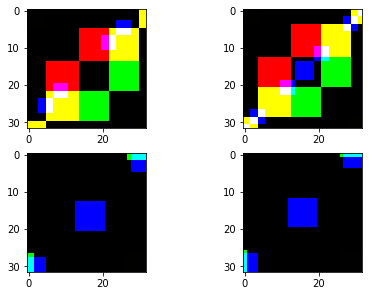

In [7]:
GASF_imgs = encode_data(raws, "GASF", "True")

plt.subplots(constrained_layout=True);
plt.subplot(221); plt.imshow(GASF_imgs[101])
plt.subplot(222); plt.imshow(GASF_imgs[102])
plt.subplot(223); plt.imshow(GASF_imgs[10001])
plt.subplot(224); plt.imshow(GASF_imgs[10002])
print(
    len(np.unique(GASF_imgs[101])),
    len(np.unique(GASF_imgs[102])),
    len(np.unique(GASF_imgs[10001])),
    len(np.unique(GASF_imgs[10002]))
     )

100%|███████████████████████████████████████████████████████████████████████████| 10003/10003 [00:05<00:00, 1761.96it/s]


1 3 3 3


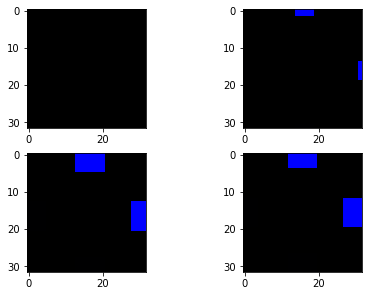

In [9]:
GADF_imgs = encode_data(raws, "GADF", "True")

plt.subplots(constrained_layout=True);
plt.subplot(221); plt.imshow(GADF_imgs[101])
plt.subplot(222); plt.imshow(GADF_imgs[102])
plt.subplot(223); plt.imshow(GADF_imgs[10001])
plt.subplot(224); plt.imshow(GADF_imgs[10002])
print(
    len(np.unique(GADF_imgs[101])),
    len(np.unique(GADF_imgs[102])),
    len(np.unique(GADF_imgs[10001])),
    len(np.unique(GADF_imgs[10002]))
     )

100%|████████████████████████████████████████████████████████████████████████████| 10003/10003 [00:10<00:00, 933.54it/s]


3 3 3 3


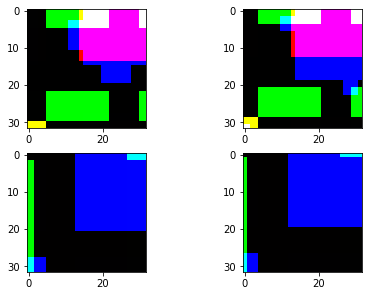

In [10]:
GAF_imgs = encode_data(raws, "GAF", "True")

plt.subplots(constrained_layout=True);
plt.subplot(221); plt.imshow(GAF_imgs[101])
plt.subplot(222); plt.imshow(GAF_imgs[102])
plt.subplot(223); plt.imshow(GAF_imgs[10001])
plt.subplot(224); plt.imshow(GAF_imgs[10002])
print(
    len(np.unique(GAF_imgs[101])),
    len(np.unique(GAF_imgs[102])),
    len(np.unique(GAF_imgs[10001])),
    len(np.unique(GAF_imgs[10002]))
     )